In [1]:
import pandas as pd
cancer_death = pd.read_csv('../data/cancer108.txt')
cancer_death.head()

,year,county,cause,sex,age_code,N
0,108,101,1,1,15,3
1,108,101,1,1,18,2
2,108,101,1,1,19,2
3,108,101,1,1,20,1
4,108,101,1,1,22,1


In [2]:
county_code = pd.read_csv('../data/county/County_100.csv')
county_code.head()
county_code['city'] = county_code['鄉鎮市區'].apply(lambda t: t[:3])
county_code.head()

,county,鄉鎮市區,city
0,101,臺北市松山區,臺北市
1,102,臺北市大安區,臺北市
2,109,臺北市大同區,臺北市
3,110,臺北市中山區,臺北市
4,111,臺北市內湖區,臺北市


In [3]:
cancer_death_new = pd.merge(left=cancer_death, right=county_code, left_on='county',right_on='county')
cancer_death_new.head()

,year,county,cause,sex,age_code,N,鄉鎮市區,city
0,108,101,1,1,15,3,臺北市松山區,臺北市
1,108,101,1,1,18,2,臺北市松山區,臺北市
2,108,101,1,1,19,2,臺北市松山區,臺北市
3,108,101,1,1,20,1,臺北市松山區,臺北市
4,108,101,1,1,22,1,臺北市松山區,臺北市


In [4]:
yunlin_cancer_death=cancer_death_new[cancer_death_new['city']=='雲林縣']
yunlin_cancer_death.head()

,year,county,cause,sex,age_code,N,鄉鎮市區,city
24196,108,3901,1,1,13,1,雲林縣斗六市,雲林縣
24197,108,3901,1,1,15,1,雲林縣斗六市,雲林縣
24198,108,3901,1,1,16,1,雲林縣斗六市,雲林縣
24199,108,3901,1,1,17,2,雲林縣斗六市,雲林縣
24200,108,3901,1,1,18,3,雲林縣斗六市,雲林縣


In [5]:
cancer_code = pd.read_csv('../data/cause/Cancer_97_after.csv')
cancer_code=cancer_code.drop(['ICD-10'], axis=1)
cancer_code.head()

,97年以後cause,死因分類
0,1,口腔癌
1,2,主唾液腺癌
2,3,鼻咽癌
3,4,食道癌
4,5,胃癌


In [6]:
yunlin_cancer_death1=pd.merge(left=yunlin_cancer_death, right=cancer_code, left_on='cause',right_on='97年以後cause')

In [7]:
yunlin_cancer_death_M = yunlin_cancer_death1[yunlin_cancer_death1['sex']==1]
yunlin_cancer_death_M = yunlin_cancer_death_M.drop(['cause','county','sex','97年以後cause','city'],axis=1)
yunlin_cancer_death_M.head()

,year,age_code,N,鄉鎮市區,死因分類
0,108,13,1,雲林縣斗六市,口腔癌
1,108,15,1,雲林縣斗六市,口腔癌
2,108,16,1,雲林縣斗六市,口腔癌
3,108,17,2,雲林縣斗六市,口腔癌
4,108,18,3,雲林縣斗六市,口腔癌


In [8]:
yunlin_cancer_death_M.to_csv('../data/108_yunlin_cancer_death_M.csv')

In [9]:
yunlin_cancer_death_F = yunlin_cancer_death1[yunlin_cancer_death1['sex']==2]
yunlin_cancer_death_F = yunlin_cancer_death_F.drop(['cause','county','sex','97年以後cause','city'],axis=1)
yunlin_cancer_death_F.head()

,year,age_code,N,鄉鎮市區,死因分類
10,108,19,1,雲林縣斗六市,口腔癌
18,108,24,1,雲林縣斗南鎮,口腔癌
25,108,23,1,雲林縣虎尾鎮,口腔癌
37,108,21,1,雲林縣西螺鎮,口腔癌
40,108,16,1,雲林縣土庫鎮,口腔癌


In [10]:
yunlin_cancer_death_F.to_csv('../data/108_yunlin_cancer_death_F.csv')

In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
import geopandas as gpd
town_shp = gpd.read_file('../data/map/TOWN_MOI_1091016.shp',encoding='utf-8')

In [19]:
town_shp.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213..."
1,T21,10013210,屏東縣,佳冬鄉,Jiadong Township,T,10013,"POLYGON ((120.54846 22.46067, 120.54853 22.460..."
2,P13,10009130,雲林縣,麥寮鄉,Mailiao Township,P,10009,"POLYGON ((120.30198 23.81625, 120.30197 23.815..."
3,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ..."
4,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ..."


<AxesSubplot:>

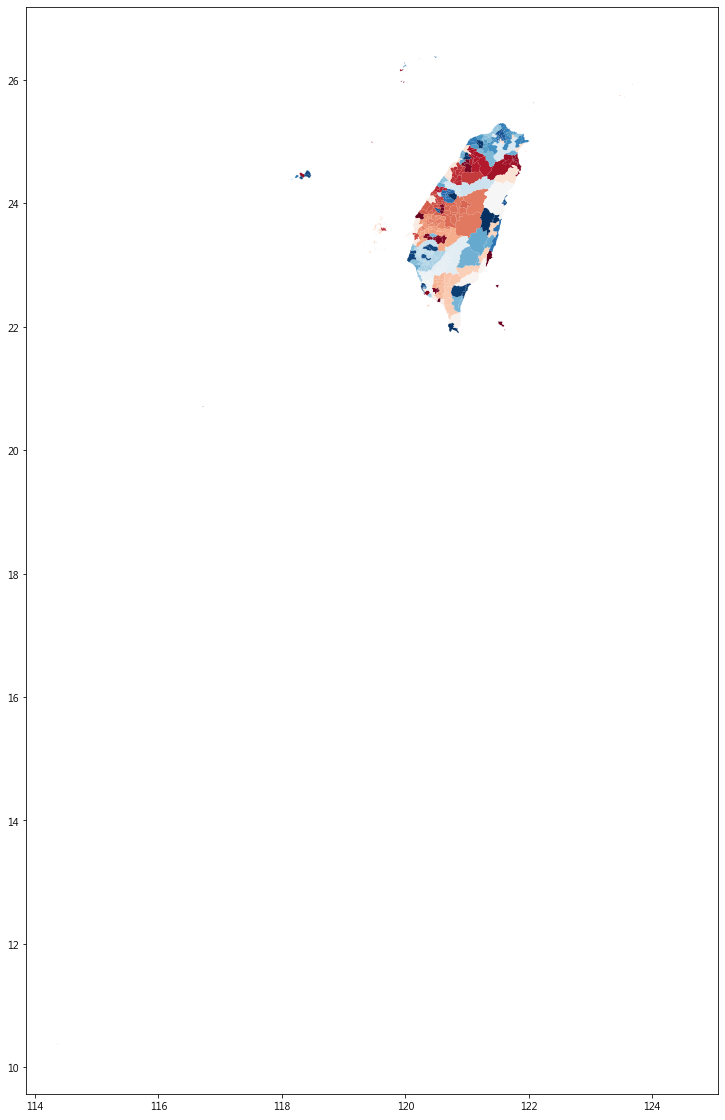

In [21]:
town_shp.plot(cmap='RdBu')

<AxesSubplot:>

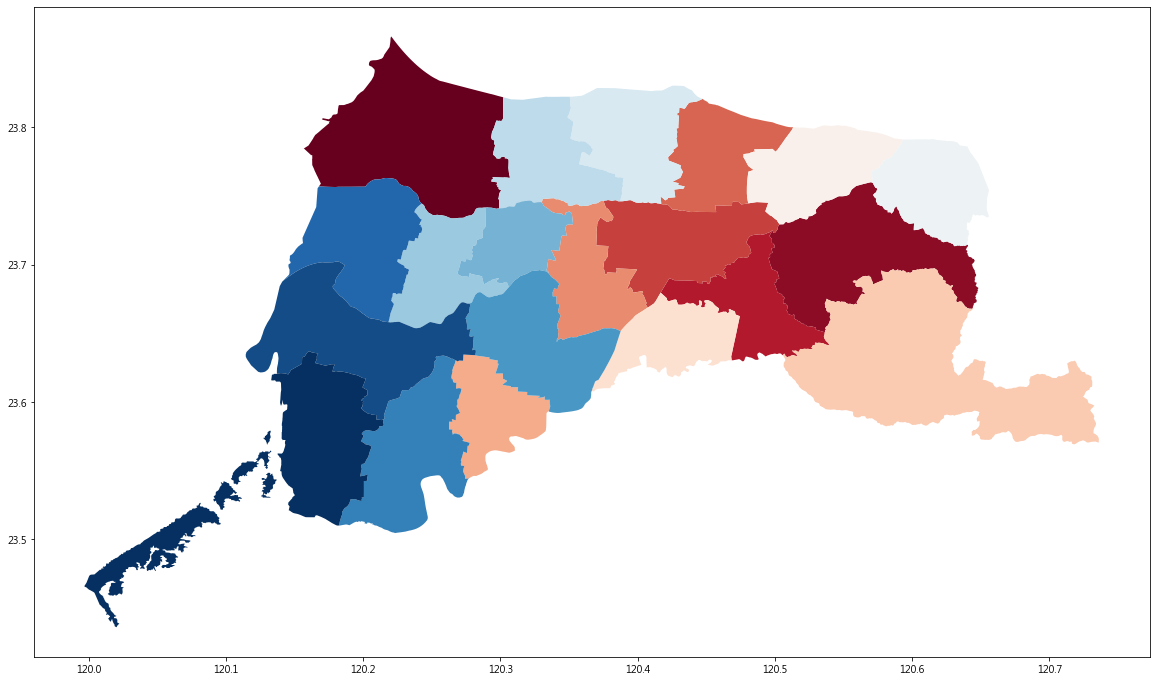

In [20]:
yunlin_town_shp=town_shp[town_shp['COUNTYNAME']=='雲林縣']
yunlin_town_shp.plot(cmap='RdBu')

In [23]:
cancer_classification = yunlin_cancer_death_M['死因分類'].unique()

In [27]:
yunlin_cancer_death_M.groupby(['鄉鎮市區', '死因分類'])['N'].count()

鄉鎮市區    死因分類      
雲林縣二崙鄉  其他癌症          2
        前列腺(攝護腺)癌     4
        口腔癌           7
        氣管、支氣管和肺癌     6
        結腸、直腸和肛門癌     3
                     ..
雲林縣麥寮鄉  膀胱癌           1
        間皮和軟組織癌       1
        非何杰金氏淋巴瘤      1
        食道癌           4
        黑色素瘤和其他皮膚癌    1
Name: N, Length: 264, dtype: int64

In [28]:
yunlin_cancer_death_M.groupby(['死因分類'])['N'].count()

死因分類
主唾液腺癌               2
其他癌症               34
前列腺(攝護腺)癌          40
口腔癌               108
喉癌                  6
小腸癌                 5
心臟、縱隔和胸(肋)膜癌        2
氣管、支氣管和肺癌         125
甲狀腺癌                1
男性生殖器官癌(攝護腺除外)      1
白血病                22
結腸、直腸和肛門癌          98
肝和肝內膽管癌           158
胃癌                 34
胰臟癌                34
腎臟癌                10
腦癌                  7
膀胱癌                22
膽囊和其他膽道癌            8
間皮和軟組織癌             7
非何杰金氏淋巴瘤           16
食道癌                66
黑色素瘤和其他皮膚癌          7
鼻咽癌                13
鼻腔、中耳和副鼻竇癌          2
Name: N, dtype: int64

In [26]:
yunlin_cancer_death_M.groupby(['鄉鎮市區'])['N'].count()

鄉鎮市區
雲林縣二崙鄉    46
雲林縣元長鄉    43
雲林縣北港鎮    43
雲林縣口湖鄉    40
雲林縣古坑鄉    37
雲林縣四湖鄉    45
雲林縣土庫鎮    35
雲林縣大埤鄉    32
雲林縣崙背鄉    32
雲林縣斗六市    81
雲林縣斗南鎮    43
雲林縣東勢鄉    25
雲林縣林內鄉    23
雲林縣水林鄉    49
雲林縣臺西鄉    36
雲林縣莿桐鄉    39
雲林縣虎尾鎮    66
雲林縣褒忠鄉    20
雲林縣西螺鎮    53
雲林縣麥寮鄉    40
Name: N, dtype: int64